## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.01),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 2.4906  | train_mse: 1.34701 | train_mae: 0.88    |  0:00:00s


epoch 1  | loss: 0.99998 | train_mse: 0.64925 | train_mae: 0.58861 |  0:00:01s


epoch 2  | loss: 0.69674 | train_mse: 0.53059 | train_mae: 0.50249 |  0:00:01s


epoch 3  | loss: 0.50617 | train_mse: 0.67935 | train_mae: 0.50441 |  0:00:02s


epoch 4  | loss: 0.43543 | train_mse: 0.44264 | train_mae: 0.44636 |  0:00:02s


epoch 5  | loss: 0.44537 | train_mse: 0.4967  | train_mae: 0.48182 |  0:00:03s


epoch 6  | loss: 0.35359 | train_mse: 0.38156 | train_mae: 0.42313 |  0:00:03s


epoch 7  | loss: 0.35287 | train_mse: 0.27501 | train_mae: 0.36766 |  0:00:04s


epoch 8  | loss: 0.3304  | train_mse: 0.22839 | train_mae: 0.37422 |  0:00:04s


epoch 9  | loss: 0.30068 | train_mse: 0.20634 | train_mae: 0.33527 |  0:00:04s


epoch 10 | loss: 0.30136 | train_mse: 0.18858 | train_mae: 0.31708 |  0:00:05s


epoch 11 | loss: 0.26829 | train_mse: 0.18879 | train_mae: 0.31165 |  0:00:05s


epoch 12 | loss: 0.24547 | train_mse: 0.18227 | train_mae: 0.29757 |  0:00:06s


epoch 13 | loss: 0.25668 | train_mse: 0.18277 | train_mae: 0.30252 |  0:00:06s


epoch 14 | loss: 0.26343 | train_mse: 0.19891 | train_mae: 0.31438 |  0:00:07s


epoch 15 | loss: 0.2397  | train_mse: 0.14478 | train_mae: 0.27286 |  0:00:07s


epoch 16 | loss: 0.22185 | train_mse: 0.12998 | train_mae: 0.25395 |  0:00:08s


epoch 17 | loss: 0.22014 | train_mse: 0.15685 | train_mae: 0.27923 |  0:00:08s


epoch 18 | loss: 0.28231 | train_mse: 0.16359 | train_mae: 0.28837 |  0:00:09s


epoch 19 | loss: 0.18048 | train_mse: 0.16144 | train_mae: 0.28243 |  0:00:09s


epoch 20 | loss: 0.21007 | train_mse: 0.16931 | train_mae: 0.28923 |  0:00:10s


epoch 21 | loss: 0.22243 | train_mse: 0.12401 | train_mae: 0.24319 |  0:00:10s


epoch 22 | loss: 0.21144 | train_mse: 0.14249 | train_mae: 0.27326 |  0:00:11s


epoch 23 | loss: 0.21666 | train_mse: 0.11184 | train_mae: 0.23863 |  0:00:12s


epoch 24 | loss: 0.229   | train_mse: 0.11387 | train_mae: 0.24922 |  0:00:13s


epoch 25 | loss: 0.16579 | train_mse: 0.11058 | train_mae: 0.23851 |  0:00:14s


epoch 26 | loss: 0.22546 | train_mse: 0.114   | train_mae: 0.23942 |  0:00:15s


epoch 27 | loss: 0.15639 | train_mse: 0.10574 | train_mae: 0.23332 |  0:00:15s


epoch 28 | loss: 0.18683 | train_mse: 0.10166 | train_mae: 0.22799 |  0:00:16s


epoch 29 | loss: 0.19545 | train_mse: 0.10348 | train_mae: 0.23254 |  0:00:16s


epoch 30 | loss: 0.1633  | train_mse: 0.09863 | train_mae: 0.22385 |  0:00:16s


epoch 31 | loss: 0.21269 | train_mse: 0.10278 | train_mae: 0.22801 |  0:00:18s


epoch 32 | loss: 0.1643  | train_mse: 0.10955 | train_mae: 0.23781 |  0:00:18s


epoch 33 | loss: 0.16495 | train_mse: 0.1052  | train_mae: 0.23446 |  0:00:18s


epoch 34 | loss: 0.16014 | train_mse: 0.13165 | train_mae: 0.25622 |  0:00:19s


epoch 35 | loss: 0.18188 | train_mse: 0.11819 | train_mae: 0.25494 |  0:00:20s


epoch 36 | loss: 0.20277 | train_mse: 0.10933 | train_mae: 0.23176 |  0:00:20s


epoch 37 | loss: 0.17064 | train_mse: 0.10034 | train_mae: 0.22544 |  0:00:21s


epoch 38 | loss: 0.16187 | train_mse: 0.11236 | train_mae: 0.24108 |  0:00:21s


epoch 39 | loss: 0.18225 | train_mse: 0.13634 | train_mae: 0.24768 |  0:00:22s


epoch 40 | loss: 0.25633 | train_mse: 0.13516 | train_mae: 0.25526 |  0:00:23s


epoch 41 | loss: 0.21412 | train_mse: 0.12699 | train_mae: 0.25125 |  0:00:23s


epoch 42 | loss: 0.18612 | train_mse: 0.10852 | train_mae: 0.23819 |  0:00:24s


epoch 43 | loss: 0.1783  | train_mse: 0.1006  | train_mae: 0.23035 |  0:00:25s


epoch 44 | loss: 0.16751 | train_mse: 0.11343 | train_mae: 0.24792 |  0:00:25s


epoch 45 | loss: 0.13844 | train_mse: 0.0936  | train_mae: 0.22439 |  0:00:26s


epoch 46 | loss: 0.15935 | train_mse: 0.09125 | train_mae: 0.22262 |  0:00:27s


epoch 47 | loss: 0.15136 | train_mse: 0.09509 | train_mae: 0.22475 |  0:00:28s


epoch 48 | loss: 0.18317 | train_mse: 0.10354 | train_mae: 0.23371 |  0:00:29s


epoch 49 | loss: 0.20317 | train_mse: 0.1068  | train_mae: 0.23823 |  0:00:30s


epoch 50 | loss: 0.16895 | train_mse: 0.0985  | train_mae: 0.22374 |  0:00:31s


epoch 51 | loss: 0.18577 | train_mse: 0.09534 | train_mae: 0.22655 |  0:00:31s


epoch 52 | loss: 0.14431 | train_mse: 0.08702 | train_mae: 0.21425 |  0:00:32s


epoch 53 | loss: 0.15346 | train_mse: 0.10356 | train_mae: 0.2331  |  0:00:33s


epoch 54 | loss: 0.16053 | train_mse: 0.10051 | train_mae: 0.23266 |  0:00:33s


epoch 55 | loss: 0.16652 | train_mse: 0.09428 | train_mae: 0.21763 |  0:00:34s


epoch 56 | loss: 0.16707 | train_mse: 0.09729 | train_mae: 0.22319 |  0:00:35s


epoch 57 | loss: 0.191   | train_mse: 0.08777 | train_mae: 0.21278 |  0:00:35s


epoch 58 | loss: 0.18367 | train_mse: 0.081   | train_mae: 0.20399 |  0:00:36s


epoch 59 | loss: 0.14984 | train_mse: 0.08166 | train_mae: 0.2061  |  0:00:37s


epoch 60 | loss: 0.15258 | train_mse: 0.08047 | train_mae: 0.20478 |  0:00:37s

epoch 61 | loss: 0.16368 | train_mse: 0.08107 | train_mae: 0.20434 |  0:00:39s


epoch 62 | loss: 0.13699 | train_mse: 0.08618 | train_mae: 0.20985 |  0:00:39s


epoch 63 | loss: 0.16643 | train_mse: 0.08561 | train_mae: 0.2073  |  0:00:40s


epoch 64 | loss: 0.14137 | train_mse: 0.09276 | train_mae: 0.215   |  0:00:41s


epoch 65 | loss: 0.17716 | train_mse: 0.09139 | train_mae: 0.21564 |  0:00:41s


epoch 66 | loss: 0.15948 | train_mse: 0.09731 | train_mae: 0.22337 |  0:00:42s


epoch 67 | loss: 0.17461 | train_mse: 0.09918 | train_mae: 0.22664 |  0:00:42s


epoch 68 | loss: 0.17028 | train_mse: 0.09015 | train_mae: 0.21669 |  0:00:43s


epoch 69 | loss: 0.14959 | train_mse: 0.0875  | train_mae: 0.20998 |  0:00:44s


epoch 70 | loss: 0.14686 | train_mse: 0.08719 | train_mae: 0.21189 |  0:00:44s


epoch 71 | loss: 0.19275 | train_mse: 0.09889 | train_mae: 0.21857 |  0:00:45s


epoch 72 | loss: 0.18129 | train_mse: 0.08435 | train_mae: 0.20845 |  0:00:45s


epoch 73 | loss: 0.15306 | train_mse: 0.09345 | train_mae: 0.21653 |  0:00:46s


epoch 74 | loss: 0.13897 | train_mse: 0.08629 | train_mae: 0.21598 |  0:00:46s


epoch 75 | loss: 0.16306 | train_mse: 0.10428 | train_mae: 0.23263 |  0:00:47s


epoch 76 | loss: 0.19128 | train_mse: 0.07979 | train_mae: 0.20417 |  0:00:47s


epoch 77 | loss: 0.17823 | train_mse: 0.10511 | train_mae: 0.23005 |  0:00:48s


epoch 78 | loss: 0.1286  | train_mse: 0.07444 | train_mae: 0.19834 |  0:00:48s


epoch 79 | loss: 0.13217 | train_mse: 0.08138 | train_mae: 0.21027 |  0:00:49s


epoch 80 | loss: 0.12081 | train_mse: 0.07228 | train_mae: 0.1972  |  0:00:49s


epoch 81 | loss: 0.11475 | train_mse: 0.07782 | train_mae: 0.20651 |  0:00:50s


epoch 82 | loss: 0.14706 | train_mse: 0.08548 | train_mae: 0.212   |  0:00:50s


epoch 83 | loss: 0.14338 | train_mse: 0.12088 | train_mae: 0.25204 |  0:00:51s


epoch 84 | loss: 0.16262 | train_mse: 0.07389 | train_mae: 0.20092 |  0:00:52s


epoch 85 | loss: 0.16088 | train_mse: 0.08112 | train_mae: 0.21195 |  0:00:52s


epoch 86 | loss: 0.13195 | train_mse: 0.07689 | train_mae: 0.20612 |  0:00:53s


epoch 87 | loss: 0.14914 | train_mse: 0.08669 | train_mae: 0.20452 |  0:00:53s


epoch 88 | loss: 0.13458 | train_mse: 0.08615 | train_mae: 0.20191 |  0:00:54s


epoch 89 | loss: 0.19345 | train_mse: 0.08673 | train_mae: 0.21631 |  0:00:55s


epoch 90 | loss: 0.1599  | train_mse: 0.07842 | train_mae: 0.20441 |  0:00:55s


epoch 91 | loss: 0.14319 | train_mse: 0.07783 | train_mae: 0.20607 |  0:00:56s


epoch 92 | loss: 0.12556 | train_mse: 0.08114 | train_mae: 0.20909 |  0:00:56s


epoch 93 | loss: 0.1197  | train_mse: 0.06903 | train_mae: 0.19702 |  0:00:57s


epoch 94 | loss: 0.15578 | train_mse: 0.08798 | train_mae: 0.22213 |  0:00:58s


epoch 95 | loss: 0.12186 | train_mse: 0.06519 | train_mae: 0.19246 |  0:00:59s


epoch 96 | loss: 0.16026 | train_mse: 0.08316 | train_mae: 0.21732 |  0:01:00s


epoch 97 | loss: 0.12298 | train_mse: 0.06472 | train_mae: 0.19476 |  0:01:01s


epoch 98 | loss: 0.16172 | train_mse: 0.06591 | train_mae: 0.19355 |  0:01:02s


epoch 99 | loss: 0.1233  | train_mse: 0.07662 | train_mae: 0.20634 |  0:01:02s


epoch 100| loss: 0.14196 | train_mse: 0.07332 | train_mae: 0.20599 |  0:01:03s


epoch 101| loss: 0.13918 | train_mse: 0.08434 | train_mae: 0.21712 |  0:01:04s


epoch 102| loss: 0.14822 | train_mse: 0.06035 | train_mae: 0.18539 |  0:01:04s


epoch 103| loss: 0.11149 | train_mse: 0.06272 | train_mae: 0.1901  |  0:01:04s


epoch 104| loss: 0.12093 | train_mse: 0.06968 | train_mae: 0.19465 |  0:01:05s


epoch 105| loss: 0.14103 | train_mse: 0.08577 | train_mae: 0.21559 |  0:01:06s


epoch 106| loss: 0.12922 | train_mse: 0.07259 | train_mae: 0.19907 |  0:01:06s


epoch 107| loss: 0.10685 | train_mse: 0.06397 | train_mae: 0.18816 |  0:01:07s


epoch 108| loss: 0.12633 | train_mse: 0.06984 | train_mae: 0.2001  |  0:01:08s


epoch 109| loss: 0.10491 | train_mse: 0.06729 | train_mae: 0.19589 |  0:01:10s


epoch 110| loss: 0.12755 | train_mse: 0.07476 | train_mae: 0.20191 |  0:01:10s


epoch 111| loss: 0.14144 | train_mse: 0.08072 | train_mae: 0.21344 |  0:01:11s


epoch 112| loss: 0.1251  | train_mse: 0.06844 | train_mae: 0.19773 |  0:01:12s


epoch 113| loss: 0.11209 | train_mse: 0.08284 | train_mae: 0.22223 |  0:01:12s


epoch 114| loss: 0.10704 | train_mse: 0.0645  | train_mae: 0.19201 |  0:01:13s


epoch 115| loss: 0.12534 | train_mse: 0.07401 | train_mae: 0.20658 |  0:01:14s


epoch 116| loss: 0.1248  | train_mse: 0.06528 | train_mae: 0.194   |  0:01:15s


epoch 117| loss: 0.09574 | train_mse: 0.06424 | train_mae: 0.19388 |  0:01:16s


epoch 118| loss: 0.11207 | train_mse: 0.06234 | train_mae: 0.19092 |  0:01:16s


epoch 119| loss: 0.11677 | train_mse: 0.07142 | train_mae: 0.20189 |  0:01:17s


epoch 120| loss: 0.12339 | train_mse: 0.06421 | train_mae: 0.18997 |  0:01:17s


epoch 121| loss: 0.10129 | train_mse: 0.06356 | train_mae: 0.19074 |  0:01:18s


epoch 122| loss: 0.11615 | train_mse: 0.06786 | train_mae: 0.19812 |  0:01:18s


epoch 123| loss: 0.11686 | train_mse: 0.05944 | train_mae: 0.18533 |  0:01:19s


epoch 124| loss: 0.14287 | train_mse: 0.06549 | train_mae: 0.19229 |  0:01:19s


epoch 125| loss: 0.13568 | train_mse: 0.0625  | train_mae: 0.19101 |  0:01:20s


epoch 126| loss: 0.138   | train_mse: 0.07169 | train_mae: 0.20347 |  0:01:21s


epoch 127| loss: 0.13587 | train_mse: 0.08739 | train_mae: 0.22378 |  0:01:22s


epoch 128| loss: 0.14453 | train_mse: 0.06506 | train_mae: 0.19258 |  0:01:23s


epoch 129| loss: 0.13659 | train_mse: 0.08365 | train_mae: 0.22212 |  0:01:24s


epoch 130| loss: 0.13081 | train_mse: 0.06334 | train_mae: 0.19112 |  0:01:25s


epoch 131| loss: 0.09653 | train_mse: 0.06658 | train_mae: 0.1951  |  0:01:25s


epoch 132| loss: 0.13914 | train_mse: 0.07524 | train_mae: 0.20671 |  0:01:26s


epoch 133| loss: 0.09742 | train_mse: 0.06465 | train_mae: 0.18915 |  0:01:26s


epoch 134| loss: 0.10949 | train_mse: 0.08965 | train_mae: 0.22657 |  0:01:28s


epoch 135| loss: 0.11482 | train_mse: 0.07413 | train_mae: 0.20193 |  0:01:29s


epoch 136| loss: 0.12244 | train_mse: 0.07548 | train_mae: 0.20959 |  0:01:30s


epoch 137| loss: 0.13771 | train_mse: 0.08077 | train_mae: 0.21019 |  0:01:31s


epoch 138| loss: 0.13753 | train_mse: 0.06237 | train_mae: 0.19356 |  0:01:32s


epoch 139| loss: 0.11651 | train_mse: 0.0612  | train_mae: 0.19006 |  0:01:33s


epoch 140| loss: 0.11648 | train_mse: 0.08451 | train_mae: 0.2246  |  0:01:34s


epoch 141| loss: 0.10671 | train_mse: 0.06278 | train_mae: 0.19239 |  0:01:35s


epoch 142| loss: 0.12284 | train_mse: 0.06701 | train_mae: 0.20029 |  0:01:36s


epoch 143| loss: 0.16411 | train_mse: 0.0825  | train_mae: 0.22149 |  0:01:36s


epoch 144| loss: 0.14022 | train_mse: 0.06347 | train_mae: 0.18999 |  0:01:37s


epoch 145| loss: 0.12139 | train_mse: 0.06606 | train_mae: 0.19961 |  0:01:37s


epoch 146| loss: 0.12729 | train_mse: 0.06488 | train_mae: 0.19242 |  0:01:38s


epoch 147| loss: 0.135   | train_mse: 0.07317 | train_mae: 0.1918  |  0:01:38s


epoch 148| loss: 0.10801 | train_mse: 0.07114 | train_mae: 0.19842 |  0:01:39s


epoch 149| loss: 0.10356 | train_mse: 0.06747 | train_mae: 0.19175 |  0:01:40s


epoch 150| loss: 0.12086 | train_mse: 0.06803 | train_mae: 0.19577 |  0:01:40s


epoch 151| loss: 0.14476 | train_mse: 0.0754  | train_mae: 0.20415 |  0:01:41s


epoch 152| loss: 0.11878 | train_mse: 0.06031 | train_mae: 0.18393 |  0:01:42s


epoch 153| loss: 0.11584 | train_mse: 0.06832 | train_mae: 0.19826 |  0:01:42s


epoch 154| loss: 0.12549 | train_mse: 0.06821 | train_mae: 0.19673 |  0:01:43s


epoch 155| loss: 0.11127 | train_mse: 0.08607 | train_mae: 0.21986 |  0:01:44s


epoch 156| loss: 0.11636 | train_mse: 0.07237 | train_mae: 0.20156 |  0:01:44s


epoch 157| loss: 0.14793 | train_mse: 0.06416 | train_mae: 0.18827 |  0:01:45s


epoch 158| loss: 0.12942 | train_mse: 0.0759  | train_mae: 0.2065  |  0:01:45s


epoch 159| loss: 0.12617 | train_mse: 0.06384 | train_mae: 0.18905 |  0:01:46s


epoch 160| loss: 0.13091 | train_mse: 0.06777 | train_mae: 0.19855 |  0:01:47s


epoch 161| loss: 0.12533 | train_mse: 0.07112 | train_mae: 0.20085 |  0:01:47s


epoch 162| loss: 0.12074 | train_mse: 0.10557 | train_mae: 0.23553 |  0:01:48s


epoch 163| loss: 0.13685 | train_mse: 0.06369 | train_mae: 0.19201 |  0:01:48s


epoch 164| loss: 0.10838 | train_mse: 0.0698  | train_mae: 0.19933 |  0:01:49s


epoch 165| loss: 0.12099 | train_mse: 0.07531 | train_mae: 0.20272 |  0:01:49s


epoch 166| loss: 0.10328 | train_mse: 0.06301 | train_mae: 0.19014 |  0:01:50s


epoch 167| loss: 0.1424  | train_mse: 0.0781  | train_mae: 0.21319 |  0:01:51s


epoch 168| loss: 0.11355 | train_mse: 0.06695 | train_mae: 0.19744 |  0:01:53s


epoch 169| loss: 0.09301 | train_mse: 0.06787 | train_mae: 0.19993 |  0:01:54s


epoch 170| loss: 0.09129 | train_mse: 0.08246 | train_mae: 0.22076 |  0:01:56s


epoch 171| loss: 0.16057 | train_mse: 0.06588 | train_mae: 0.19443 |  0:01:57s


epoch 172| loss: 0.11463 | train_mse: 0.06516 | train_mae: 0.19603 |  0:01:58s


epoch 173| loss: 0.12522 | train_mse: 0.05808 | train_mae: 0.18387 |  0:01:59s


epoch 174| loss: 0.14463 | train_mse: 0.05988 | train_mae: 0.18677 |  0:02:00s


epoch 175| loss: 0.11065 | train_mse: 0.06551 | train_mae: 0.19573 |  0:02:02s


epoch 176| loss: 0.11808 | train_mse: 0.06916 | train_mae: 0.19796 |  0:02:03s


epoch 177| loss: 0.08823 | train_mse: 0.07218 | train_mae: 0.20072 |  0:02:05s


epoch 178| loss: 0.11025 | train_mse: 0.06956 | train_mae: 0.20017 |  0:02:06s


epoch 179| loss: 0.12712 | train_mse: 0.09421 | train_mae: 0.203   |  0:02:08s


epoch 180| loss: 0.11965 | train_mse: 0.09596 | train_mae: 0.20304 |  0:02:09s


epoch 181| loss: 0.10101 | train_mse: 0.08638 | train_mae: 0.2048  |  0:02:10s


epoch 182| loss: 0.10981 | train_mse: 0.07322 | train_mae: 0.20401 |  0:02:11s


epoch 183| loss: 0.09886 | train_mse: 0.06661 | train_mae: 0.1968  |  0:02:13s


epoch 184| loss: 0.13961 | train_mse: 0.07182 | train_mae: 0.20394 |  0:02:14s


epoch 185| loss: 0.09781 | train_mse: 0.07054 | train_mae: 0.20227 |  0:02:15s


epoch 186| loss: 0.12451 | train_mse: 0.05621 | train_mae: 0.17978 |  0:02:16s


epoch 187| loss: 0.12859 | train_mse: 0.10781 | train_mae: 0.22148 |  0:02:17s


epoch 188| loss: 0.12609 | train_mse: 0.10579 | train_mae: 0.21538 |  0:02:17s


epoch 189| loss: 0.14451 | train_mse: 0.06838 | train_mae: 0.1917  |  0:02:18s


epoch 190| loss: 0.15916 | train_mse: 0.08845 | train_mae: 0.21542 |  0:02:19s


epoch 191| loss: 0.14491 | train_mse: 0.05592 | train_mae: 0.1765  |  0:02:20s


epoch 192| loss: 0.1212  | train_mse: 0.05824 | train_mae: 0.17838 |  0:02:20s


epoch 193| loss: 0.08995 | train_mse: 0.05904 | train_mae: 0.18441 |  0:02:20s


epoch 194| loss: 0.10788 | train_mse: 0.05956 | train_mae: 0.18517 |  0:02:21s


epoch 195| loss: 0.12546 | train_mse: 0.07089 | train_mae: 0.20125 |  0:02:21s


epoch 196| loss: 0.09823 | train_mse: 0.06367 | train_mae: 0.18855 |  0:02:21s


epoch 197| loss: 0.11221 | train_mse: 0.06966 | train_mae: 0.20236 |  0:02:22s


epoch 198| loss: 0.10341 | train_mse: 0.06033 | train_mae: 0.18225 |  0:02:22s


epoch 199| loss: 0.11843 | train_mse: 0.06287 | train_mae: 0.18857 |  0:02:23s


epoch 200| loss: 0.10135 | train_mse: 0.0658  | train_mae: 0.19379 |  0:02:24s


epoch 201| loss: 0.1268  | train_mse: 0.07661 | train_mae: 0.2062  |  0:02:25s


epoch 202| loss: 0.11231 | train_mse: 0.05919 | train_mae: 0.1838  |  0:02:26s


epoch 203| loss: 0.10478 | train_mse: 0.0703  | train_mae: 0.20121 |  0:02:26s


epoch 204| loss: 0.10801 | train_mse: 0.05275 | train_mae: 0.17271 |  0:02:27s


epoch 205| loss: 0.13229 | train_mse: 0.05578 | train_mae: 0.18425 |  0:02:27s


epoch 206| loss: 0.12119 | train_mse: 0.06189 | train_mae: 0.18966 |  0:02:28s


epoch 207| loss: 0.11545 | train_mse: 0.09121 | train_mae: 0.20142 |  0:02:28s


epoch 208| loss: 0.08929 | train_mse: 0.07158 | train_mae: 0.20028 |  0:02:29s


epoch 209| loss: 0.11406 | train_mse: 0.06466 | train_mae: 0.19169 |  0:02:29s


epoch 210| loss: 0.12917 | train_mse: 0.06259 | train_mae: 0.19082 |  0:02:29s


epoch 211| loss: 0.09378 | train_mse: 0.06372 | train_mae: 0.1936  |  0:02:30s


epoch 212| loss: 0.13329 | train_mse: 0.05933 | train_mae: 0.18661 |  0:02:30s


epoch 213| loss: 0.10212 | train_mse: 0.06295 | train_mae: 0.19032 |  0:02:31s


epoch 214| loss: 0.14718 | train_mse: 0.05591 | train_mae: 0.17641 |  0:02:31s


epoch 215| loss: 0.11006 | train_mse: 0.0653  | train_mae: 0.19354 |  0:02:32s


epoch 216| loss: 0.09672 | train_mse: 0.06383 | train_mae: 0.18595 |  0:02:32s


epoch 217| loss: 0.15147 | train_mse: 0.06483 | train_mae: 0.19198 |  0:02:32s


epoch 218| loss: 0.08915 | train_mse: 0.07679 | train_mae: 0.1956  |  0:02:33s


epoch 219| loss: 0.11796 | train_mse: 0.05699 | train_mae: 0.18399 |  0:02:33s


epoch 220| loss: 0.12723 | train_mse: 0.06216 | train_mae: 0.19014 |  0:02:34s


epoch 221| loss: 0.10521 | train_mse: 0.05549 | train_mae: 0.1778  |  0:02:34s


epoch 222| loss: 0.10989 | train_mse: 0.06322 | train_mae: 0.19235 |  0:02:35s


epoch 223| loss: 0.10643 | train_mse: 0.05394 | train_mae: 0.17784 |  0:02:35s


epoch 224| loss: 0.11311 | train_mse: 0.07241 | train_mae: 0.19565 |  0:02:36s


epoch 225| loss: 0.11675 | train_mse: 0.06537 | train_mae: 0.18361 |  0:02:37s


epoch 226| loss: 0.11455 | train_mse: 0.06308 | train_mae: 0.1917  |  0:02:37s


epoch 227| loss: 0.10825 | train_mse: 0.05791 | train_mae: 0.18433 |  0:02:38s


epoch 228| loss: 0.09626 | train_mse: 0.05003 | train_mae: 0.17137 |  0:02:38s


epoch 229| loss: 0.08464 | train_mse: 0.06345 | train_mae: 0.19215 |  0:02:38s


epoch 230| loss: 0.10191 | train_mse: 0.06603 | train_mae: 0.19576 |  0:02:39s


epoch 231| loss: 0.10104 | train_mse: 0.06541 | train_mae: 0.19636 |  0:02:39s


epoch 232| loss: 0.08884 | train_mse: 0.05607 | train_mae: 0.18338 |  0:02:40s


epoch 233| loss: 0.11086 | train_mse: 0.05679 | train_mae: 0.18232 |  0:02:41s


epoch 234| loss: 0.10497 | train_mse: 0.05325 | train_mae: 0.17607 |  0:02:41s


epoch 235| loss: 0.09863 | train_mse: 0.05166 | train_mae: 0.1734  |  0:02:41s


epoch 236| loss: 0.1136  | train_mse: 0.06295 | train_mae: 0.19068 |  0:02:42s


epoch 237| loss: 0.11945 | train_mse: 0.05217 | train_mae: 0.17353 |  0:02:43s


epoch 238| loss: 0.10032 | train_mse: 0.05083 | train_mae: 0.17168 |  0:02:43s


epoch 239| loss: 0.0989  | train_mse: 0.06935 | train_mae: 0.19836 |  0:02:44s


epoch 240| loss: 0.10439 | train_mse: 0.06035 | train_mae: 0.1856  |  0:02:44s


epoch 241| loss: 0.09251 | train_mse: 0.05686 | train_mae: 0.18091 |  0:02:45s


epoch 242| loss: 0.08375 | train_mse: 0.06316 | train_mae: 0.19115 |  0:02:46s


epoch 243| loss: 0.0869  | train_mse: 0.05708 | train_mae: 0.17962 |  0:02:46s


epoch 244| loss: 0.1096  | train_mse: 0.05332 | train_mae: 0.17382 |  0:02:47s


epoch 245| loss: 0.1023  | train_mse: 0.05921 | train_mae: 0.18387 |  0:02:47s


epoch 246| loss: 0.10353 | train_mse: 0.059   | train_mae: 0.18593 |  0:02:47s


epoch 247| loss: 0.1321  | train_mse: 0.05278 | train_mae: 0.16911 |  0:02:48s


epoch 248| loss: 0.08804 | train_mse: 0.0564  | train_mae: 0.17991 |  0:02:48s


epoch 249| loss: 0.08823 | train_mse: 0.06262 | train_mae: 0.18581 |  0:02:49s


epoch 250| loss: 0.10558 | train_mse: 0.05579 | train_mae: 0.17037 |  0:02:49s


epoch 251| loss: 0.10461 | train_mse: 0.05525 | train_mae: 0.16964 |  0:02:49s


epoch 252| loss: 0.16653 | train_mse: 0.07518 | train_mae: 0.19823 |  0:02:50s


epoch 253| loss: 0.10926 | train_mse: 0.05861 | train_mae: 0.17988 |  0:02:50s


epoch 254| loss: 0.15063 | train_mse: 0.05443 | train_mae: 0.17675 |  0:02:51s


epoch 255| loss: 0.13266 | train_mse: 0.07093 | train_mae: 0.19893 |  0:02:52s


epoch 256| loss: 0.12462 | train_mse: 0.06108 | train_mae: 0.18024 |  0:02:52s


epoch 257| loss: 0.10055 | train_mse: 0.11094 | train_mae: 0.21304 |  0:02:53s


epoch 258| loss: 0.13757 | train_mse: 0.07588 | train_mae: 0.20027 |  0:02:55s


epoch 259| loss: 0.08649 | train_mse: 0.06753 | train_mae: 0.18519 |  0:02:56s


epoch 260| loss: 0.10294 | train_mse: 0.07118 | train_mae: 0.19574 |  0:02:56s


epoch 261| loss: 0.11935 | train_mse: 0.05523 | train_mae: 0.17236 |  0:02:58s


epoch 262| loss: 0.12819 | train_mse: 0.05222 | train_mae: 0.17184 |  0:02:58s


epoch 263| loss: 0.08199 | train_mse: 0.0573  | train_mae: 0.17434 |  0:02:59s


epoch 264| loss: 0.1141  | train_mse: 0.05741 | train_mae: 0.18237 |  0:03:00s


epoch 265| loss: 0.15225 | train_mse: 0.05601 | train_mae: 0.17985 |  0:03:01s


epoch 266| loss: 0.13882 | train_mse: 0.06489 | train_mae: 0.19112 |  0:03:01s


epoch 267| loss: 0.09655 | train_mse: 0.05827 | train_mae: 0.17588 |  0:03:02s


epoch 268| loss: 0.11131 | train_mse: 0.09814 | train_mae: 0.20981 |  0:03:02s


epoch 269| loss: 0.10847 | train_mse: 0.07857 | train_mae: 0.20911 |  0:03:03s


epoch 270| loss: 0.12212 | train_mse: 0.0703  | train_mae: 0.19239 |  0:03:04s


epoch 271| loss: 0.09829 | train_mse: 0.06066 | train_mae: 0.1833  |  0:03:04s


epoch 272| loss: 0.09791 | train_mse: 0.05713 | train_mae: 0.17593 |  0:03:04s


epoch 273| loss: 0.12541 | train_mse: 0.07271 | train_mae: 0.18223 |  0:03:05s


epoch 274| loss: 0.12315 | train_mse: 0.07713 | train_mae: 0.19011 |  0:03:06s


epoch 275| loss: 0.13055 | train_mse: 0.07229 | train_mae: 0.2034  |  0:03:06s


epoch 276| loss: 0.12277 | train_mse: 0.05647 | train_mae: 0.18259 |  0:03:07s


epoch 277| loss: 0.108   | train_mse: 0.06375 | train_mae: 0.19226 |  0:03:07s


epoch 278| loss: 0.10209 | train_mse: 0.06581 | train_mae: 0.18994 |  0:03:08s


epoch 279| loss: 0.10233 | train_mse: 0.06081 | train_mae: 0.18926 |  0:03:08s


epoch 280| loss: 0.10373 | train_mse: 0.07085 | train_mae: 0.20488 |  0:03:09s


epoch 281| loss: 0.10793 | train_mse: 0.08129 | train_mae: 0.20032 |  0:03:09s


epoch 282| loss: 0.11426 | train_mse: 0.07764 | train_mae: 0.20711 |  0:03:09s


epoch 283| loss: 0.15286 | train_mse: 0.07679 | train_mae: 0.20149 |  0:03:10s


epoch 284| loss: 0.12468 | train_mse: 0.06152 | train_mae: 0.18316 |  0:03:10s


epoch 285| loss: 0.09251 | train_mse: 0.06177 | train_mae: 0.18379 |  0:03:10s


epoch 286| loss: 0.11497 | train_mse: 0.06589 | train_mae: 0.18703 |  0:03:11s


epoch 287| loss: 0.12122 | train_mse: 0.06867 | train_mae: 0.18771 |  0:03:11s


epoch 288| loss: 0.12376 | train_mse: 0.06594 | train_mae: 0.18803 |  0:03:12s


epoch 289| loss: 0.1352  | train_mse: 0.07531 | train_mae: 0.19664 |  0:03:13s


epoch 290| loss: 0.10779 | train_mse: 0.07458 | train_mae: 0.18901 |  0:03:13s


epoch 291| loss: 0.09898 | train_mse: 0.08042 | train_mae: 0.19483 |  0:03:14s


epoch 292| loss: 0.12392 | train_mse: 0.09208 | train_mae: 0.20302 |  0:03:15s


epoch 293| loss: 0.10436 | train_mse: 0.06338 | train_mae: 0.17772 |  0:03:16s


epoch 294| loss: 0.09883 | train_mse: 0.06034 | train_mae: 0.17301 |  0:03:17s


epoch 295| loss: 0.11721 | train_mse: 0.06752 | train_mae: 0.18399 |  0:03:18s


epoch 296| loss: 0.10871 | train_mse: 0.06127 | train_mae: 0.17624 |  0:03:20s


epoch 297| loss: 0.11126 | train_mse: 0.06923 | train_mae: 0.19192 |  0:03:20s

Early stopping occurred at epoch 297 with best_epoch = 247 and best_train_mae = 0.16911
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.23500125078177256


ABC Pre-generator MAE 0.2796910309040307


# mGAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

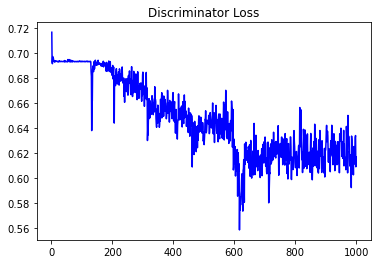

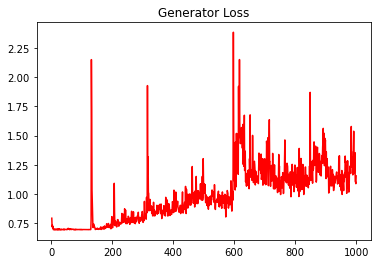

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MAE")
print(mean(ABC_GAN1_metrics[1]))

MAE
0.2951101167335668


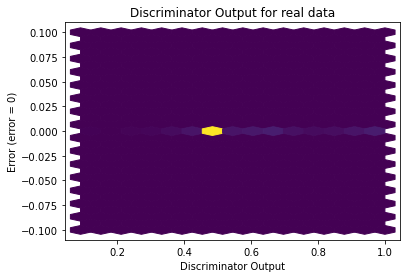

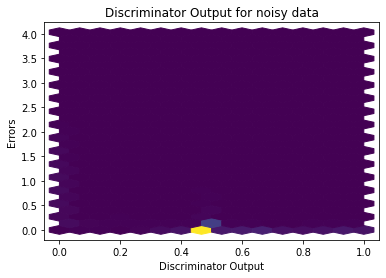

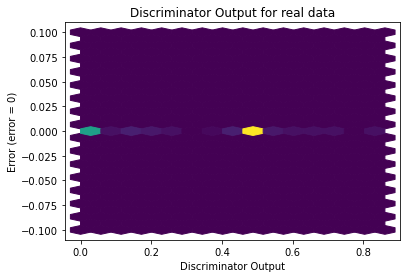

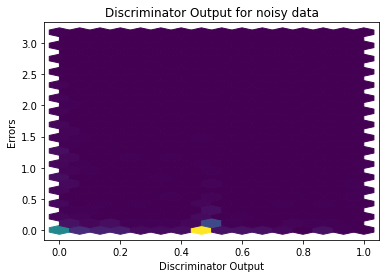

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

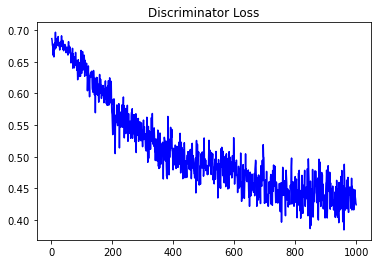

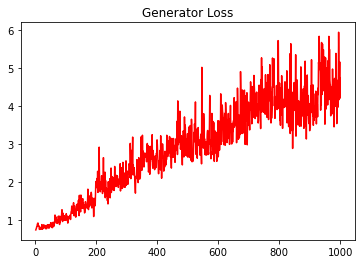

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.268514167309063


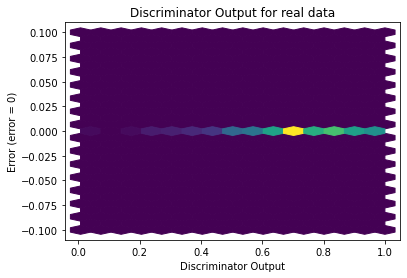

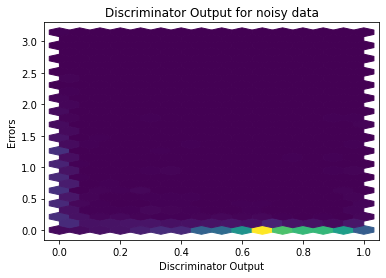

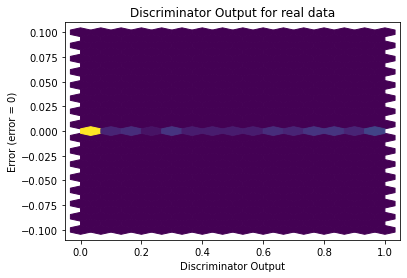

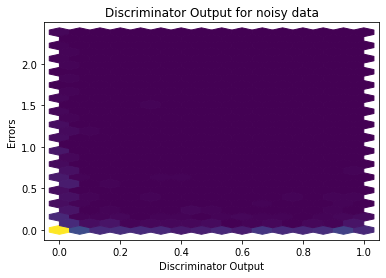

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


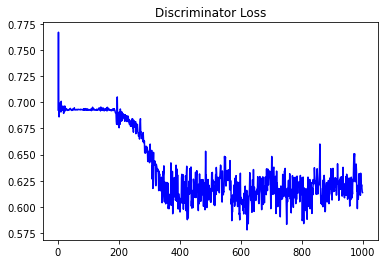

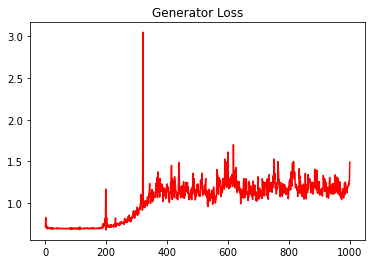

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
0.2400667728291021


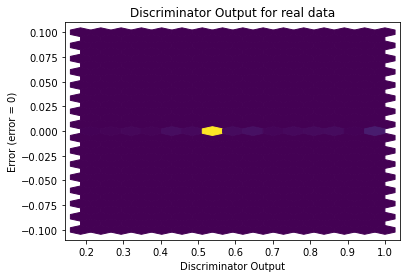

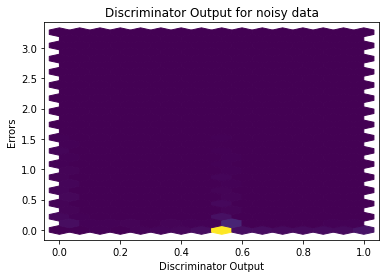

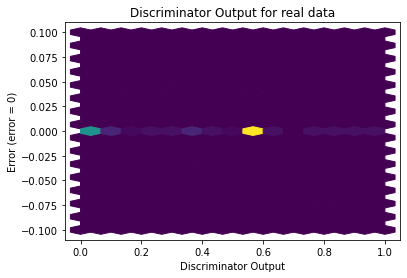

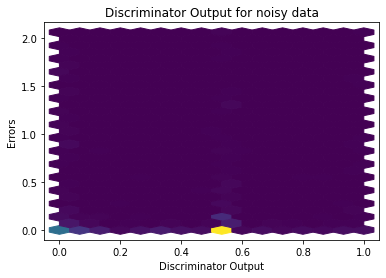

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.01, betas=(0.5, 0.999))


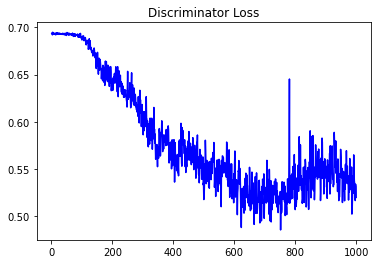

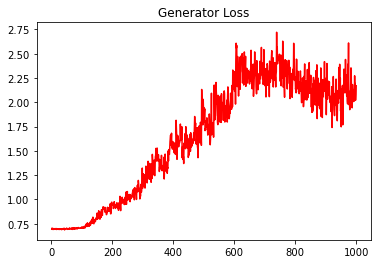

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.25064894848977964


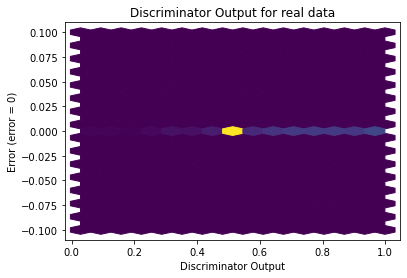

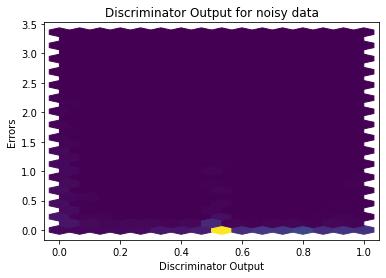

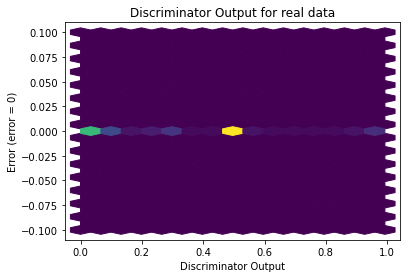

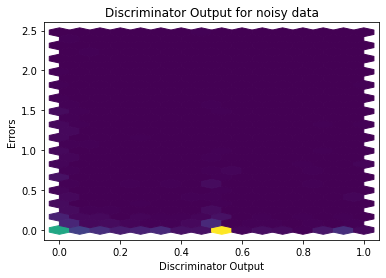

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1145]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1688]], requires_grad=True)
